<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Maturation-over-long-time-scale" data-toc-modified-id="Maturation-over-long-time-scale-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Maturation over long time scale</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>High Resources</a></span></li></ul></li><li><span><a href="#Maturation-over-Short-Time-Scale" data-toc-modified-id="Maturation-over-Short-Time-Scale-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Maturation over Short Time Scale</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>High Resources</a></span></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Low Resources</a></span></li></ul></li><li><span><a href="#Metabolic-Exponent" data-toc-modified-id="Metabolic-Exponent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metabolic Exponent</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>High Resources</a></span></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Low Resources</a></span></li></ul></li><li><span><a href="#Resource-Density" data-toc-modified-id="Resource-Density-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Resource Density</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>High Resources</a></span></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Low Resources</a></span></li></ul></li><li><span><a href="#Shrinkage" data-toc-modified-id="Shrinkage-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Shrinkage</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>High Resources</a></span></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Low Resources</a></span></li></ul></li></ul></div>

Plots the results of report_plots.py 

In [1]:
## Imports
from numpy import around, array, arange, linspace
import matplotlib.pyplot as plt
from string import ascii_lowercase
import pandas as pd
import seaborn as sb
sb.set(style="whitegrid")

In [2]:
## paper sizes
a4_sheet = array([8.3, 11.7]) # in inches
a4_width = a4_sheet[0]
a4_heigth = a4_sheet[1]
a4_box = array([8.3, 8.3])
titlefont = 10
labelfont = 5


In [3]:
## Functions
def make_file_list(directory, parameters, dimensions, prefix = None):
    """
    directory (str) : directory where the files are held.
    parameters (list) : The name of the parameter(s) to be read in, each as a string.
    dimensions (list) : The dimensions of the parameters, each as string.
    prefix (string) : A tag onto the filename to differentiate runs. Defaults to `None`
    
    returns:
        (list) : The file names for the parameter in the dimensions as a list of strings. 
    """

        
    file_list = []
    for dim in dimensions:
        for param in parameters: # in case i wish to have >1 parameter
            if prefix == None:
                file_name = f"{directory}sensitivity{param}{dim}.csv"
            else:
                file_name = f"{directory}sensitivity{prefix}{param}{dim}.csv"
            file_list.append(file_name)
    return file_list

def plot_file_list(file_list, x_label):
    
    fig=plt.figure(figsize=(a4_width*1.3, a4_width*0.5))
    for i, param in enumerate(["c", "rho"],1):
        ax = plt.subplot(1,2,i)
        for j, file_name in enumerate(file_list):
#             plt.text(0.02, 0.5, textstr, fontsize=14, transform=plt.gcf().transFigure)
            plt.text(0.07+(i-1)*0.43, 0.95, f"{list(ascii_lowercase)[i-1]})",  
                     transform=fig.transFigure)
            file = pd.read_csv(file_name)
            x_key = file.columns[2]
            x_vals = file[x_key]
            y_vals = file[param]
            plt.plot(x_vals, y_vals, label = dimensions[j])
#             plt.xlabel(x_label)
            if param == "rho":
                y_label = "$\\rho$"
            else:
                y_label = "$c$"
            plt.ylabel(y_label)
            plt.legend()
    fig.add_subplot(111, frameon=False)
    plt.grid(False)
    plt.tick_params(labelcolor="none")
    plt.xlabel(x_label)
    return 0 

def show_data(file_list):
    """
    Displays all the data in a list of .csv files.
    """
    for file in file_list:
        print(file)
        display(pd.read_csv(file))
    return 0

In [4]:
dimensions = ["2D", "3D"]
tmp_directory = "../results/tmp_low_res_sens/"
directory = "../results/"
prefix = "LowResources"

# Maturation over long time scale

## High Resources

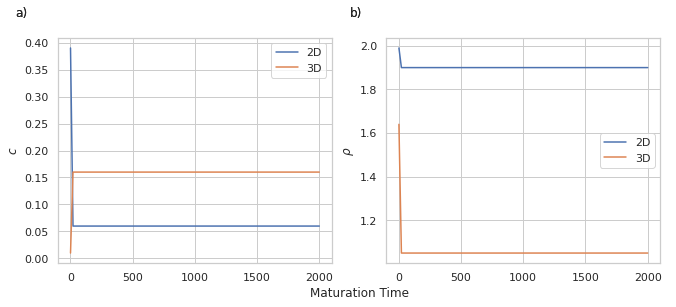

In [5]:
file_list = make_file_list(directory, ["alpha_long"], dimensions)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Maturation_Time_Long.pdf")

# Maturation over Short Time Scale

## High Resources

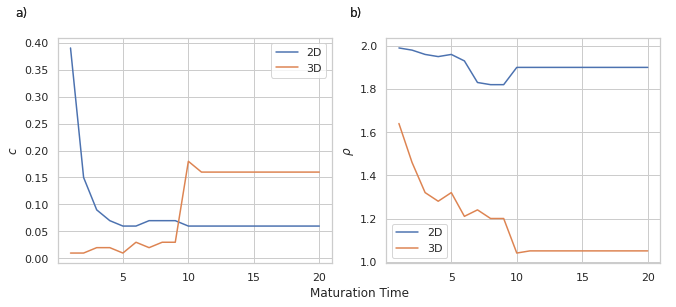

In [6]:
file_list = make_file_list(directory, ["alpha"], dimensions)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Maturation_Time_short.pdf")

## Low Resources

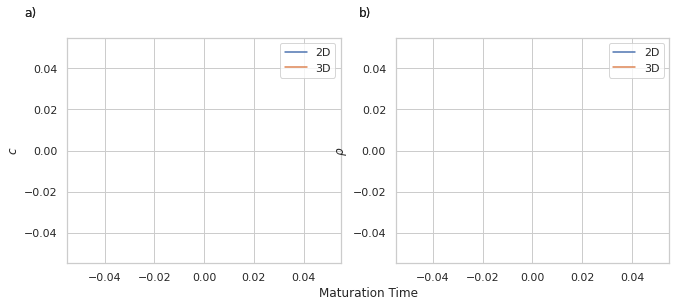

In [7]:
file_list = make_file_list(directory, ["alpha"], dimensions, prefix)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Low_Resources_Maturation_Time_short.pdf")

0

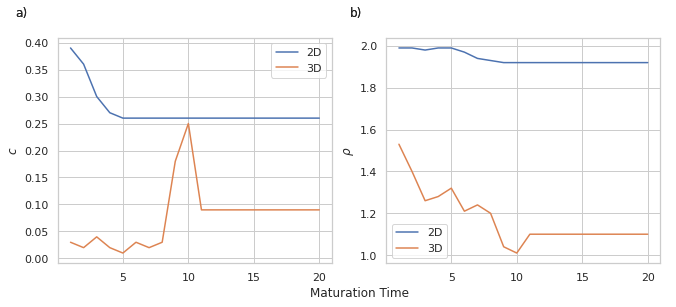

In [8]:
file_list = make_file_list(tmp_directory, ["alpha"], dimensions, prefix)
plot_file_list(file_list, "Maturation Time")
# plt.savefig("../results/Sens_Low_Resources_Maturation_Time_short.pdf")

In [9]:
show_data(file_list)

../results/tmp_low_res_sens/sensitivityLowResourcesalpha2D.csv


,c,rho,alpha
0,0.39,1.99,1
1,0.36,1.99,2
2,0.30,1.98,3
3,0.27,1.99,4
4,0.26,1.99,5
5,0.26,1.97,6
6,0.26,1.94,7
7,0.26,1.93,8
8,0.26,1.92,9
9,0.26,1.92,10


../results/tmp_low_res_sens/sensitivityLowResourcesalpha3D.csv


,c,rho,alpha
0,0.03,1.53,1
1,0.02,1.40,2
2,0.04,1.26,3
3,0.02,1.28,4
4,0.01,1.32,5
5,0.03,1.21,6
6,0.02,1.24,7
7,0.03,1.20,8
8,0.18,1.04,9
9,0.25,1.01,10


0

# Metabolic Exponent

## High Resources

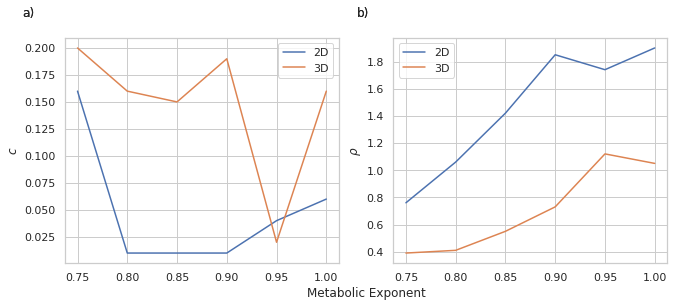

In [10]:
file_list = make_file_list(directory, ["meta_exp"], dimensions)
plot_file_list(file_list, "Metabolic Exponent")
plt.savefig("../results/Sens_Metabolic_Exponent.pdf")

## Low Resources

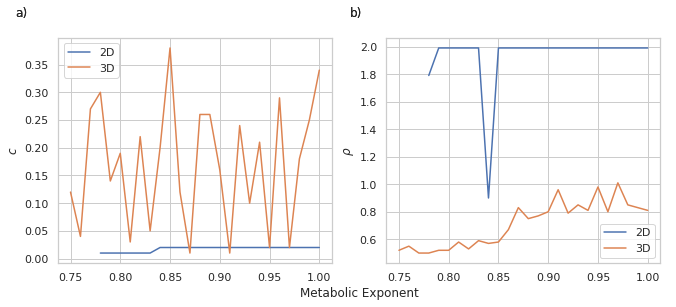

In [11]:
file_list = make_file_list(directory, ["meta_exp"], dimensions, prefix)
plot_file_list(file_list, "Metabolic Exponent")
plt.savefig("../results/Sens_Low_Resources_Metabolic_Exponent.pdf")

0

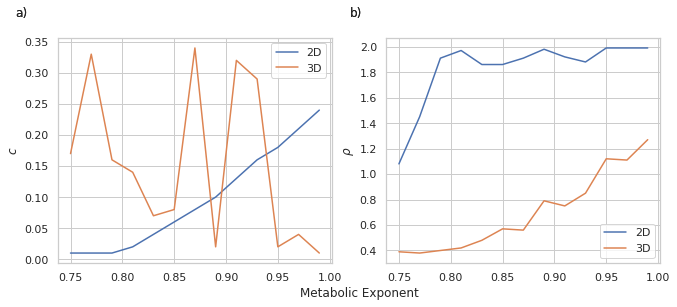

In [12]:
file_list = make_file_list(tmp_directory, ["meta_exp"], dimensions, prefix)
plot_file_list(file_list, "Metabolic Exponent")
# plt.savefig("../results/Sens_Low_Resources_Metabolic_Exponent.pdf")

Notes:
- could try with more data points to smooth out the tail end.

# Resource Density

## High Resources

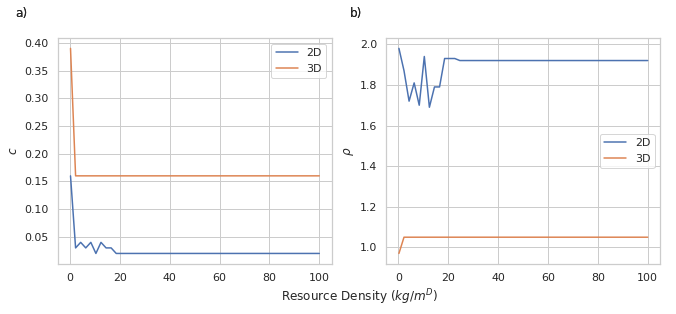

In [13]:
file_list = make_file_list(directory, ["Xr"], dimensions)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
plt.savefig("../results/Sens_Resource_Density.pdf")

In [14]:
# show_data(file_list)

## Low Resources

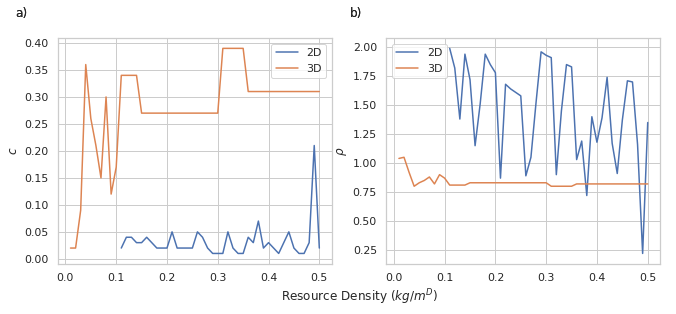

In [15]:
file_list = make_file_list(directory, ["Xr"], dimensions, prefix)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
plt.savefig("../results/Sens_Low_Resources_Resource_Density.pdf")

0

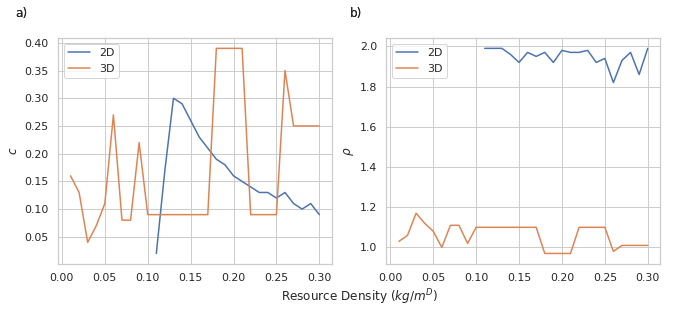

In [16]:
file_list = make_file_list(tmp_directory, ["Xr"], dimensions, prefix)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
# plt.savefig("../results/Sens_Low_Resources_Resource_Density.pdf")

In [17]:
show_data(file_list)

../results/tmp_low_res_sens/sensitivityLowResourcesXr2D.csv


,c,rho,Xr
0,NaN,NaN,0.01
1,NaN,NaN,0.02
2,NaN,NaN,0.03
3,NaN,NaN,0.04
4,NaN,NaN,0.05
5,NaN,NaN,0.06
6,NaN,NaN,0.07
7,NaN,NaN,0.08
8,NaN,NaN,0.09
9,NaN,NaN,0.10


../results/tmp_low_res_sens/sensitivityLowResourcesXr3D.csv


,c,rho,Xr
0,0.16,1.03,0.01
1,0.13,1.06,0.02
2,0.04,1.17,0.03
3,0.07,1.12,0.04
4,0.11,1.08,0.05
5,0.27,1.00,0.06
6,0.08,1.11,0.07
7,0.08,1.11,0.08
8,0.22,1.02,0.09
9,0.09,1.10,0.10


0

# Shrinkage

## High Resources

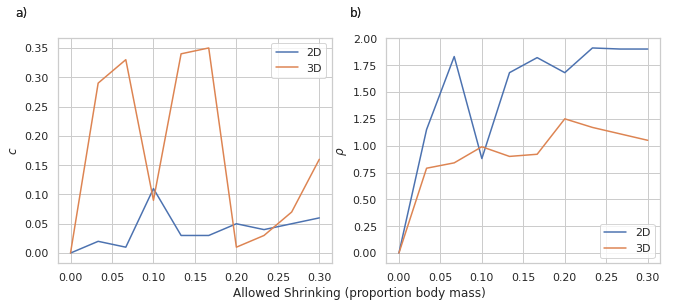

In [18]:
file_list = make_file_list(directory, ["shrinkage"], dimensions)
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_Shrink.pdf")

## Low Resources

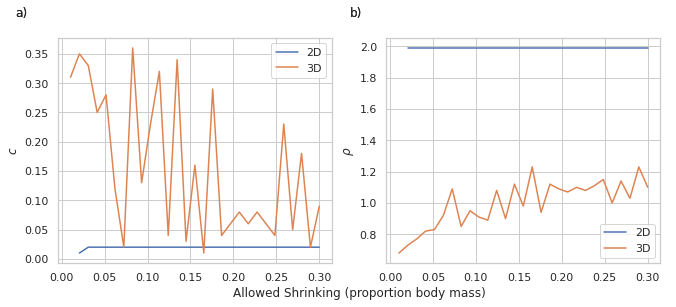

In [19]:
file_list = make_file_list(directory, ["shrinkage"], dimensions, prefix)
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_Low_Resources_Shrink.pdf")

In [20]:
# show_data(file_list)